# Exploring Different Datasets

In [205]:
# Step 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
#%matplotlib inline #if you're working in a Jupyter notebook


In [206]:

# Step 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

print("original data dimension is:", df.shape)

countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]
print("now data dimension is:", df.shape)

# Step 3 - Creating a Summary Column (Here we are creating a new column, 'Cases')
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head


original data dimension is: (29892, 5)
now data dimension is: (954, 5)


<bound method NDFrame.head of             Date         Country  Confirmed  Recovered  Deaths    Cases
32    2020-01-22          Canada          0          0       0        0
36    2020-01-22           China        548         28      17      593
62    2020-01-22          France          0          0       0        0
66    2020-01-22         Germany          0          0       0        0
174   2020-01-22              US          1          0       0        1
...          ...             ...        ...        ...     ...      ...
29740 2020-06-28           China      84757      79609    4641   169007
29766 2020-06-28          France     199476      75774   29781   305031
29770 2020-06-28         Germany     194693     177657    8968   381318
29878 2020-06-28              US    2548996     685164  125803  3359963
29882 2020-06-28  United Kingdom     312640       1364   43634   357638

[954 rows x 6 columns]>

In [207]:
# Step 4 - Restructuring our Data (check out: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
df = df.pivot(index='Date', columns='Country', values='Cases')
print(df.shape)
countries = list(df.columns)
print(countries)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries



# States 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
print(percapita)

(159, 6)
['Canada', 'China', 'France', 'Germany', 'US', 'United Kingdom']
                Canada      China  ...           US  United Kingdom
Date                               ...                             
2020-01-22    0.000000   0.041237  ...     0.000303        0.000000
2020-01-23    0.000000   0.048052  ...     0.000303        0.000000
2020-01-24    0.000000   0.068288  ...     0.000605        0.000000
2020-01-25    0.000000   0.103406  ...     0.000605        0.000000
2020-01-26    0.002655   0.151597  ...     0.001513        0.000000
...                ...        ...  ...          ...             ...
2020-06-24  475.683785  11.743519  ...   956.128976      520.402657
2020-06-25  477.635224  11.746231  ...   971.194224      522.294912
2020-06-26  478.917598  11.748456  ...   987.267796      524.606030
2020-06-27  480.290242  11.750473  ...  1002.876988      526.069098
2020-06-28  481.790328  11.752698  ...  1016.480123      527.468748

[159 rows x 6 columns]


Text(2020-01-23 00:00:00, -100000, 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

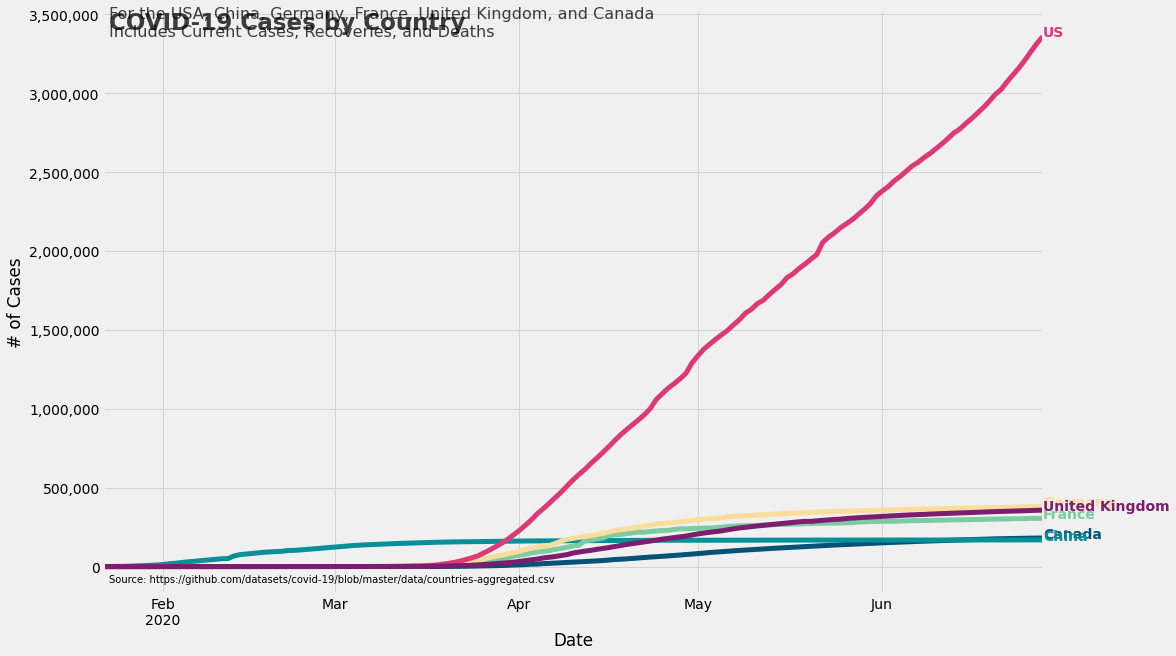

In [208]:
# Step 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Step 7 - Creating the Visualization
plot = covid.plot(figsize=(15,10), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Step 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+5000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)



# Covid19 Analysis
## Fun Summer Data Science Project
### Step 1: Reading Data

We will load COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

This data is daily-updated, so we can keep our project up-to-date just by loading this data again.

1. Load the data and examine it's columns and values:

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
#import theme


In [210]:
#get data for confirmed cases
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

print(covid_confirmed.shape)

covid_confirmed.columns


(266, 163)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20',
       '6/25/20', '6/26/20', '6/27/20', '6/28/20'],
      dtype='object', length=163)

In [211]:
covid_confirmed["Country/Region"]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, Length: 266, dtype: object

In [212]:
covid_confirmed["Province/State"].isnull().sum()

185

In [213]:
#vector = covid_confirmed["Province/State"].isna()
#covid_confirmed[vector] = " "

covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed["Province/State"].isnull().sum()

0

In [214]:
covid_confirmed.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
6/24/20           0
6/25/20           0
6/26/20           0
6/27/20           0
6/28/20           0
Length: 163, dtype: int64

In [215]:
covid_confirmed.fillna(0, inplace=True)
covid_confirmed.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
6/24/20           0
6/25/20           0
6/26/20           0
6/27/20           0
6/28/20           0
Length: 163, dtype: int64

In [216]:
#Number of unique countries/regions
covid_confirmed['Country/Region'].nunique()
#covid_confirmed.shape

188

In [217]:
covid_confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [218]:
# get data for reported covid deaths
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11


In [219]:
# get data for recovered
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)
covid_recovered.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81


In [220]:
mobility_reports_url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=2a2bd4912d1fa29a'
mobility_data = pd.read_csv(mobility_reports_url)
mobility_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [221]:
#is residential_percent_change_from_baseline the mobility rate percent decrease we should be looking at?
#should we sum all of the percents?
total_mobility = mobility_data[["country_region", "date", "residential_percent_change_from_baseline"]]
total_mobility

,country_region,date,residential_percent_change_from_baseline
0,United Arab Emirates,2020-02-15,1.0
1,United Arab Emirates,2020-02-16,1.0
2,United Arab Emirates,2020-02-17,1.0
3,United Arab Emirates,2020-02-18,1.0
4,United Arab Emirates,2020-02-19,1.0
...,...,...,...
588534,Zimbabwe,2020-06-19,NaN
588535,Zimbabwe,2020-06-20,NaN
588536,Zimbabwe,2020-06-21,NaN
588537,Zimbabwe,2020-06-22,NaN


In [222]:
#group by country_region while matching up the dates
#mobility_agg = total_mobility.groupby("country_region")
bl = total_mobility["country_region"] == "United Arab Emirates"
ua = total_mobility[bl]

Step 2 is cleaning the data.
1. Explore the 3 datasets above

2. replace NAs in String Variables with '' and NAs in Numeric Variables with a 0.

3. Given that $$ Active = Confirmed - Deaths - Recovered $$

  Create a data dictionary or a mini dataframe that shows the number of confirmed cases, deaths, recovered and active cases world wide.

4. Create a visualization of this mini dataframe and other exploration you find interesting 

In [223]:
#Making a data frame for the confirmed, deaths, recovered, and active cases for every country
import numpy as np
cols = covid_confirmed["Country/Region"].unique()
i = ["Confirmed", "Active", "Recovered", "Deaths"]
d = np.zeros((4, len(cols)))
data = pd.DataFrame(data= d, index=i, columns=cols)
data

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,...,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
Confirmed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Recovered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
data.at["Recovered", "Afghanistan"]

0.0

In [225]:
for country in data.columns:
  vector = covid_confirmed["Country/Region"] == country
  data.at["Confirmed", country] = covid_confirmed.loc[vector, covid_confirmed.columns[-1:]].sum()
for country in data.columns:
  vector = covid_recovered["Country/Region"] == country
  data.at["Recovered", country] = covid_recovered.loc[vector, covid_recovered.columns[-1:]].sum()
for country in data.columns:
  vector = covid_deaths["Country/Region"] == country
  data.at["Deaths", country] = covid_deaths.loc[vector, covid_deaths.columns[-1]].sum()
for country in data.columns:
  data.at["Active", country] = data.at["Confirmed", country] - data.at["Recovered", country] - data.at["Deaths", country]
data.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,...,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
Confirmed,30967.0,2402.0,13273.0,855.0,267.0,69.0,59933.0,24645.0,7764.0,17654.0,16424.0,104.0,25705.0,137787.0,97.0,61475.0,61295.0,1149.0,76.0,31524.0,3935.0,1344143.0,141.0,4691.0,959.0,1155.0,141.0,12592.0,105193.0,3429.0,866.0,271982.0,84757.0,91995.0,1087.0,6827.0,3130.0,9101.0,2691.0,712.0,...,126.0,1169.0,197239.0,859.0,43856.0,47797.0,312640.0,929.0,2548996.0,7948.0,5297.0,355.0,1557.0,567.0,18.0,23.0,859.0,256.0,24.0,24.0,19.0,762.0,1990.0,1614.0,2147.0,15.0,2169.0,299.0,9.0,92.0,170.0,1427.0,1146.0,1989.0,10.0,713.0,1118.0,272.0,5849.0,27.0
Active,17642.0,963.0,3005.0,4.0,175.0,44.0,38567.0,11103.0,653.0,551.0,7200.0,6.0,5105.0,80322.0,0.0,16065.0,34622.0,827.0,38.0,21993.0,1419.0,540503.0,0.0,1964.0,76.0,573.0,11.0,2179.0,28922.0,2685.0,12.0,34263.0,507.0,50394.0,594.0,5685.0,1749.0,5227.0,432.0,48.0,...,9.0,90.0,21547.0,65.0,23129.0,11073.0,267642.0,84.0,1738029.0,2597.0,3604.0,25.0,224.0,419.0,0.0,0.0,626.0,145.0,0.0,4.0,0.0,545.0,1539.0,1275.0,601.0,0.0,1085.0,75.0,7.0,66.0,54.0,424.0,873.0,1707.0,1.0,481.0,386.0,104.0,1349.0,23.0
Recovered,12604.0,1384.0,9371.0,799.0,81.0,22.0,20134.0,13116.0,7007.0,16401.0,9026.0,87.0,20517.0,55727.0,90.0,45027.0,16941.0,306.0,38.0,8517.0,2338.0,746018.0,138.0,2508.0,830.0,570.0,130.0,10100.0,67689.0,699.0,780.0,232210.0,79609.0,38345.0,456.0,985.0,1366.0,3808.0,2152.0,651.0,...,109.0,1029.0,170595.0,794.0,19585.0,36411.0,1364.0,818.0,685164.0,5329.0,1649.0,330.0,1311.0,142.0,18.0,23.0,228.0,102.0,24.0,18.0,19.0,196.0,447.0,317.0,1432.0,15.0,1047.0,218.0,0.0,25.0,115.0,943.0,260.0,246.0,8.0,219.0,430.0,161.0,4448.0,4.0
Deaths,721.0,55.0,897.0,52.0,11.0,3.0,1232.0,426.0,104.0,702.0,198.0,11.0,83.0,1738.0,7.0,383.0,9732.0,16.0,0.0,1014.0,178.0,57622.0,3.0,219.0,53.0,12.0,0.0,313.0,8582.0,45.0,74.0,5509.0,4641.0,3256.0,37.0,157.0,15.0,66.0,107.0,13.0,...,8.0,50.0,5097.0,0.0,1142.0,313.0,43634.0,27.0,125803.0,22.0,44.0,0.0,22.0,6.0,0.0,0.0,5.0,9.0,0.0,2.0,0.0,21.0,4.0,22.0,114.0,0.0,37.0,6.0,2.0,1.0,1.0,60.0,13.0,36.0,1.0,13.0,302.0,7.0,52.0,0.0


In [226]:
d2 = data.transpose()
d2.head()

,Confirmed,Active,Recovered,Deaths
Afghanistan,30967.0,17642.0,12604.0,721.0
Albania,2402.0,963.0,1384.0,55.0
Algeria,13273.0,3005.0,9371.0,897.0
Andorra,855.0,4.0,799.0,52.0
Angola,267.0,175.0,81.0,11.0


Showing the top ten countries with the highest confirmed, recovered cases, deaths, and mortality rates

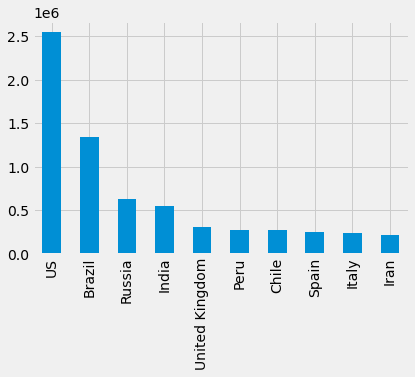

In [227]:
top_10_confirmed = d2.sort_values(by="Confirmed", ascending=False)
def graph_top_confirmed():
  plt.figure()
  top_10_confirmed.head(10)["Confirmed"].plot(kind = 'bar')
graph_top_confirmed()

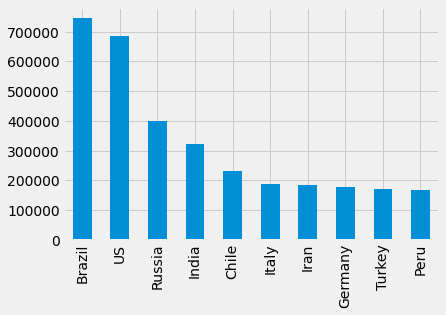

In [228]:
top_10_recoveries = d2.sort_values(by="Recovered", ascending=False)
def graph_top_recoveries():
  plt.figure()
  top_10_recoveries.head(10)["Recovered"].plot(kind = "bar")
graph_top_recoveries()

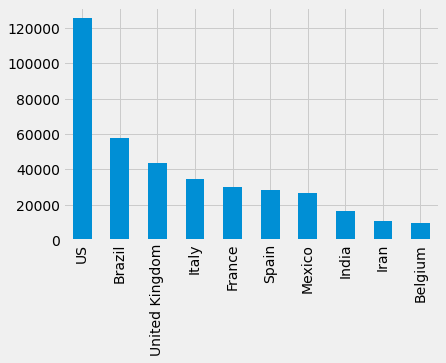

In [229]:
top_10_deaths = d2.sort_values(by="Deaths", ascending=False)
def graph_top_deaths():
  plt.figure()
  top_10_deaths.head(10)["Deaths"].plot(kind="bar")
graph_top_deaths()

<Figure size 432x288 with 0 Axes>

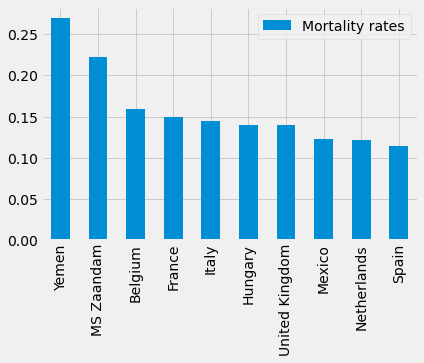

In [230]:
rates = []
for c in data.columns:
  rates.append(data.loc["Deaths", c]/data.loc["Confirmed", c])
country_mortality_rates = pd.DataFrame(data=rates, index=d2.index, columns=["Mortality rates"])
#country_mortality_rates.index = country_mortality_rates
country_mortality_rates = country_mortality_rates.sort_values(by="Mortality rates", ascending=False)
plt.figure()
country_mortality_rates.head(10).plot(kind = "bar")

Graphing country case counts

<Figure size 432x288 with 0 Axes>

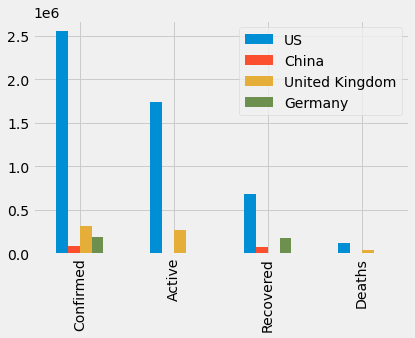

In [231]:
#Bar graph of statistics for US, China, UK, and Germany
def graph_country_recents(countries):
  plt.figure()
  data[countries].plot(kind='bar')
graph_country_recents(["US", "China", "United Kingdom", "Germany"])

Worldwide data over time

In [232]:
covid_worldwide_confirmed = covid_confirmed.iloc[:, 4:].sum(axis=0)

covid_worldwide_confirmed.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

In [233]:
covid_worldwide_deaths = covid_deaths.iloc[:, 4:].sum(axis=0)

In [234]:
covid_worldwide_recovered = covid_recovered.iloc[:, 4:].sum(axis=0)

In [235]:
covid_worldwide_active = covid_worldwide_confirmed - covid_worldwide_deaths - covid_worldwide_recovered

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
#import theme


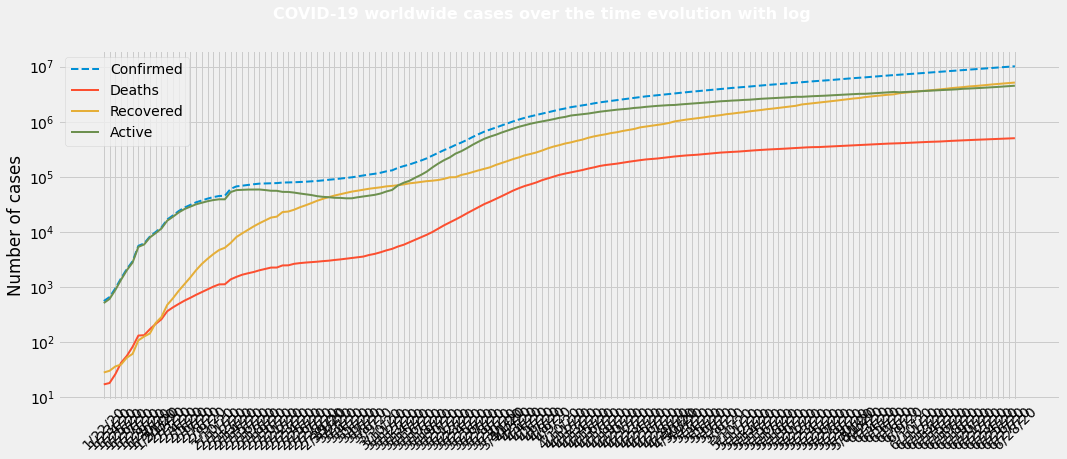

In [237]:
def get_worldwide_over_time():
  fig, ax = plt.subplots(figsize=(16, 6))
  sns.lineplot(x=covid_worldwide_confirmed.index, y=covid_worldwide_confirmed, sort=False, linewidth=2)
  sns.lineplot(x=covid_worldwide_deaths.index, y=covid_worldwide_deaths, sort=False, linewidth=2)
  sns.lineplot(x=covid_worldwide_recovered.index, y=covid_worldwide_recovered, sort=False, linewidth=2)
  sns.lineplot(x=covid_worldwide_active.index, y=covid_worldwide_active, sort=False, linewidth=2)
  ax.lines[0].set_linestyle("--")
  ax.set(yscale="log")
  plt.suptitle("COVID-19 worldwide cases over the time evolution with log", fontsize=16, fontweight='bold', color='white')
  plt.xticks(rotation=45)
  plt.ylabel('Number of cases')
  ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
  plt.show() 
get_worldwide_over_time()

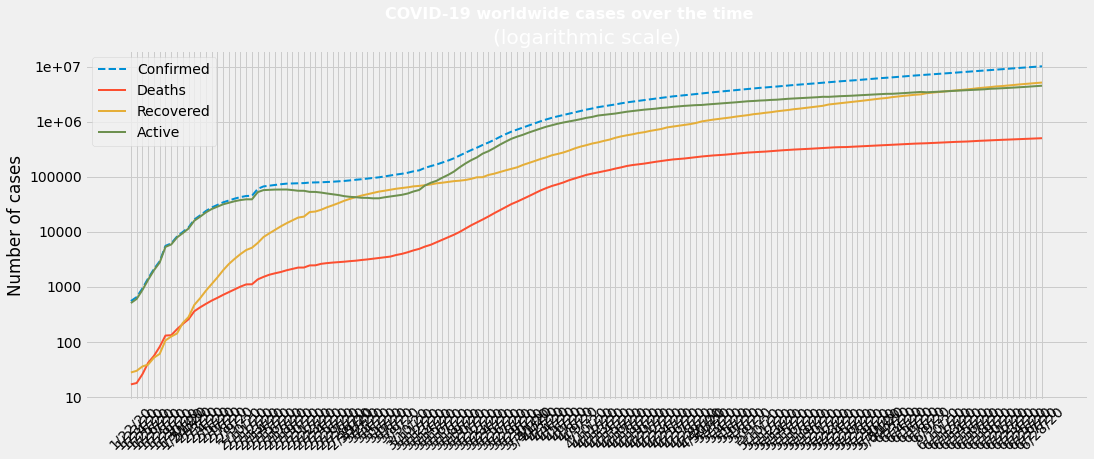

In [238]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_worldwide_confirmed.index, y=covid_worldwide_confirmed, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_deaths.index, y=covid_worldwide_deaths, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_recovered.index, y=covid_worldwide_recovered, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_active.index, y=covid_worldwide_active, sort=False, linewidth=2)

ax.lines[0].set_linestyle("--")

plt.suptitle("COVID-19 worldwide cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Number of cases')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()

Worldwide current data

In [239]:
#world wide confirmed
confirmed = covid_confirmed.iloc[:, 4:].sum().max()
confirmed

10145791

In [240]:
#world wide deaths
deaths = covid_deaths.iloc[:, 4:].sum().max()
deaths

501893

In [241]:
#world wide recoveries
recovered = covid_recovered.iloc[:, 4:].sum().max()
recovered

5140899

In [242]:
#world wide active cases
active = confirmed - deaths - recovered
active

4502999

In [243]:
worldwide = [confirmed, active, recovered, deaths]
world = pd.DataFrame(data=worldwide, index=["Confirmed", "Active", "Recovered", "Deaths"], columns=["Totals"])
world

,Totals
Confirmed,10145791
Active,4502999
Recovered,5140899
Deaths,501893


<Figure size 432x288 with 0 Axes>

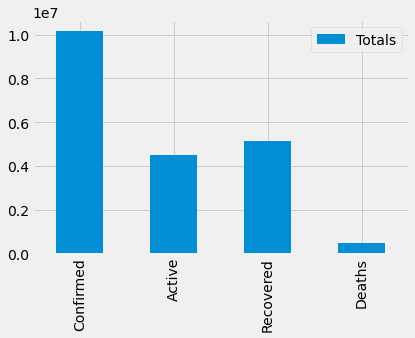

In [244]:
#bar graph of world wide statistics
def plot_worldwide_current():
  plt.figure()
  world.plot(kind='bar')
plot_worldwide_current()

Percent of confirmed cases resulting in deaths, recoveries, or still active cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



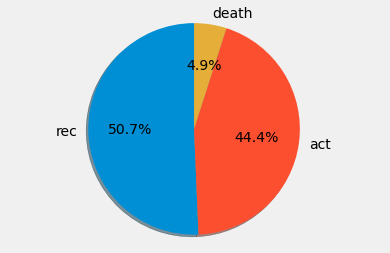

Totals    0.506703
Name: Confirmed, dtype: float64 Totals    0.443829
Name: Confirmed, dtype: float64 Totals    0.049468
Name: Confirmed, dtype: float64


In [245]:
#pie chart of the percent of the world population affected by covid-19
population = world.loc["Confirmed"]
rec = world.loc["Recovered", "Totals"]/population
act = world.loc["Active", "Totals"]/population
death = world.loc["Deaths", "Totals"]/population
vals = [rec, act, death]
labels = ["rec", "act", "death"]
fig1, ax1 = plt.subplots()
ax1.pie(vals, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()
print(rec, act, death)

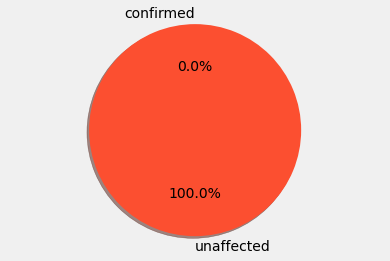

0.001300742435897436


In [246]:
population = 7800000000
conf = world.loc["Confirmed", "Totals"]/population
val2 = [conf, population-conf]
labels2 = ["confirmed", "unaffected"]
fig1, ax1 = plt.subplots()
ax1.pie(val2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print(conf)

In [247]:
#Go through every country and find the average number of new cases each day
dates = covid_confirmed.iloc[:, 4:]
dates["Province/State"] = covid_confirmed["Province/State"]
dates.index=covid_confirmed["Country/Region"]
dates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,Province/State
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,251,251,251,251,299,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,197,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,
Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34,78,78,87,87,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,


In [248]:
avg_new_cases = {}
for country in dates.index:
  cur_value = 0
  prev_value = dates.at[country, '1/22/20']
  avg_new_cases[country] = 0
  for date in dates.columns[1:]:
    cur_value = dates.at[country, date]
    try: 
      avg_new_cases[country] += (cur_value-prev_value)
      prev_value = cur_value
    except:
      continue
  avg_new_cases[country] = avg_new_cases[country]/141
avg_new_cases["China"]

array([7.02127660e+00, 6.36879433e+00, 4.08510638e+00, 2.56737589e+00,
       1.15602837e+00, 1.14255319e+01, 1.78723404e+00, 1.03546099e+00,
       1.18439716e+00, 2.46808511e+00, 6.71631206e+00, 9.01418440e+00,
       8.50354610e+00, 4.80078014e+02, 7.19858156e+00, 1.68794326e+00,
       4.63120567e+00, 6.59574468e+00, 1.09929078e+00, 1.08510638e+00,
       3.19148936e-01, 5.24822695e-01, 1.27659574e-01, 2.26950355e+00,
       5.60283688e+00, 4.95744681e+00, 1.39716312e+00, 4.16312057e+00,
       1.37588652e+00, 7.09219858e-03, 5.39007092e-01, 1.30496454e+00,
       8.92907801e+00])

In [249]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267


Date of each country's first confirmed case

In [250]:
#When does each country confirm their first case
first_confirmed_case = covid_confirmed.iloc[:, :1]
first_confirmed_case.index = covid_confirmed["Country/Region"]
first = []
first_confirmed_case
for c in covid_confirmed.index:
  for date in dates.columns:
    if not covid_confirmed.at[c, date] == 0:
      first.append(date)
      break
first_confirmed_case["Date"] = first
first_confirmed_case.head()

,Province/State,Date
Country/Region,,
Afghanistan,,2/24/20
Albania,,3/9/20
Algeria,,2/25/20
Andorra,,3/2/20
Angola,,3/20/20


In [251]:
def get_first_confirmed_case(country):
  print(first_confirmed_case.loc[country, :])
get_first_confirmed_case("United Kingdom")

                             Province/State     Date
Country/Region                                      
United Kingdom                      Bermuda  3/19/20
United Kingdom               Cayman Islands  3/13/20
United Kingdom              Channel Islands  3/10/20
United Kingdom                    Gibraltar   3/4/20
United Kingdom                  Isle of Man  3/20/20
United Kingdom                   Montserrat  3/18/20
United Kingdom                               1/31/20
United Kingdom                     Anguilla  3/28/20
United Kingdom       British Virgin Islands  3/28/20
United Kingdom     Turks and Caicos Islands  3/28/20
United Kingdom  Falkland Islands (Malvinas)   4/4/20


In [252]:
#Death rate for every country
country_death_rate = {}
for country in data.columns:
  country_death_rate[country] = data.at["Deaths", country]/data.at["Confirmed", country]
country_death_rate["US"]

0.04935394170881398

In [253]:
def get_death_rate(country):
  print(country_death_rate[country])
get_death_rate("US")

0.04935394170881398


In [254]:
world.head()

,Totals
Confirmed,10145791
Active,4502999
Recovered,5140899
Deaths,501893


World recovery and mortality rates

In [255]:
#world mortality rate
death_rate = world.at["Deaths", "Totals"]/world.at["Confirmed", "Totals"]
death_rate

0.049468099628703174

In [256]:
#world recovery rate
recovery_rate = world.at["Recovered", "Totals"]/world.at["Confirmed", "Totals"]
recovery_rate

0.506702631662726

In [257]:
#world mortality rate over time
worldwide_mortality_rate = (covid_worldwide_deaths/covid_worldwide_confirmed)*100
worldwide_mortality_rate

1/22/20    3.063063
1/23/20    2.752294
1/24/20    2.763018
1/25/20    2.928870
1/26/20    2.644004
             ...   
6/24/20    5.118260
6/25/20    5.091404
6/26/20    5.041483
6/27/20    4.996966
6/28/20    4.946810
Length: 159, dtype: float64

In [258]:
#world recovery rate over time
worldwide_recovery_rate = (covid_worldwide_recovered/covid_worldwide_confirmed)*100
worldwide_recovery_rate

1/22/20     5.045045
1/23/20     4.587156
1/24/20     3.825717
1/25/20     2.719665
1/26/20     2.455146
             ...    
6/24/20    50.318933
6/25/20    50.350089
6/26/20    50.453057
6/27/20    50.618576
6/28/20    50.670263
Length: 159, dtype: float64

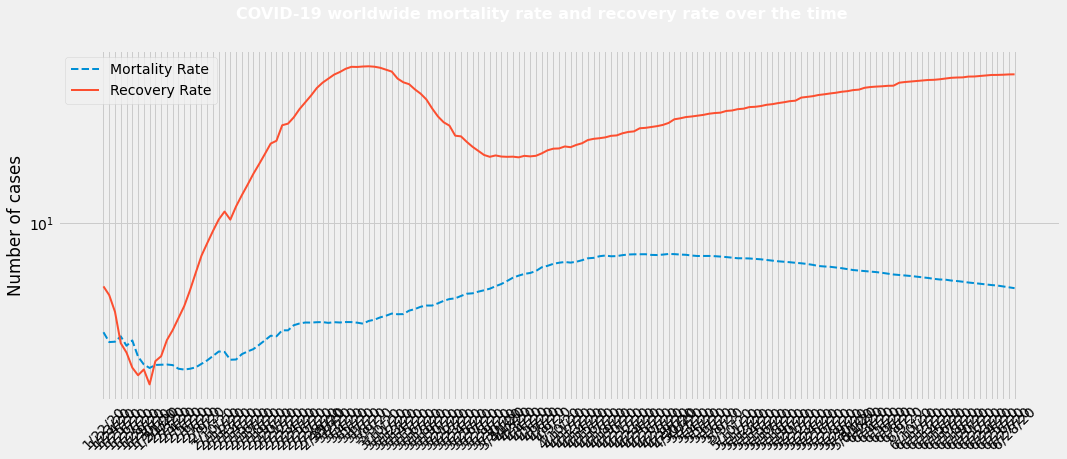

In [259]:
def graph_worldwide_rates():
  fig, ax = plt.subplots(figsize=(16, 6))
  ax.set(yscale="log")
  sns.lineplot(x=worldwide_mortality_rate.index, y=worldwide_mortality_rate, sort=False, linewidth=2)
  sns.lineplot(x=worldwide_recovery_rate.index, y=worldwide_recovery_rate, sort=False, linewidth=2)
  ax.lines[0].set_linestyle("--")
  plt.suptitle("COVID-19 worldwide mortality rate and recovery rate over the time", fontsize=16, fontweight='bold', color='white')
  plt.xticks(rotation=45)
  plt.ylabel('Number of cases')
  ax.legend(['Mortality Rate', 'Recovery Rate'])
  plt.show() 
graph_worldwide_rates()


## Visualizing worldwide COVID-19 cases in a map

We'll now create a small animation showing COVID-19 confirmed cases through the days.


Hands on! Let's group rows with the same value at the `Country/Region` column, so we can aggregate all the values from each country in a single aggregated value. We'll use the `sum()` method to count all the values from the same country.


In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
#import theme
covid_confirmed["Country/Region"].value_counts()

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Pakistan           1
Uruguay            1
Senegal            1
Finland            1
Sweden             1
Name: Country/Region, Length: 188, dtype: int64

In [261]:
b = covid_confirmed["Country/Region"] == "China"
covid_confirmed.loc[b, :]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,593,593,593,593,593,593,593,593,593,593,593,593,593,593,594,594,594,594,594,594,594,594,595,601,637,673,700,731,752,777,777,821,830,843,850,863,874,891,905,912
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,580,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,356,356,356,356,356,357,357,358,358,358,358,358,358,358,358,358,358,359,359,359,359,360,361,361,361,362,362,362,362,362,362,363,363,363,363,363,363,363,363,363
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,149,150,151,151,151,151,158,158,161,161,162,163,163
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1590,1590,1591,1592,1592,1592,1592,1592,1592,1593,1593,1595,1596,1597,1598,1598,1601,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628,1628,1628,1631,1631,1634,1634,1634,1634,1635,1635,1637,1637,1637
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,170,170,170,170,170,170,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,331,335,336,338,340,340,344,346,346,348,349,349,349,349,349


In [262]:
covid_confirmed_agg = covid_confirmed.groupby('Country/Region').sum().reset_index()
covid_confirmed_agg["Country/Region"].value_counts()

Moldova                  1
Sierra Leone             1
Iceland                  1
Estonia                  1
Austria                  1
                        ..
Saint Kitts and Nevis    1
Albania                  1
Pakistan                 1
Uruguay                  1
Sweden                   1
Name: Country/Region, Length: 188, dtype: int64

In [263]:
b = covid_confirmed_agg["Country/Region"] == "China"
covid_confirmed_agg.loc[b, :]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,...,84063,84063,84081,84084,84095,84102,84103,84106,84106,84123,84128,84146,84154,84161,84160,84171,84177,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378,84422,84458,84494,84494,84553,84572,84624,84653,84673,84701,84725,84743,84757


As there could be many Provinces/States within the same country, we'll calculate the mean latitude and longitude for each country.

In [264]:
covid_confirmed_agg.loc[:, ['Lat', 'Long']] = covid_confirmed.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]

In [265]:
covid_confirmed_agg.loc[b, :] 

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
36,China,32.828385,111.649082,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,...,84063,84063,84081,84084,84095,84102,84103,84106,84106,84123,84128,84146,84154,84161,84160,84171,84177,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378,84422,84458,84494,84494,84553,84572,84624,84653,84673,84701,84725,84743,84757


Now we'll do is filtering countries with more than a MIN_CASES value, in this case we'll use 100 cases.

In [266]:
MIN_CASES = 100

covid_confirmed_agg = covid_confirmed_agg[covid_confirmed_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]

Our data is now ready, but in a wrong format, so we'll need to transform our data from wide to long format, to do that we'll use the melt() pandas method.

In [267]:
print(covid_confirmed_agg.shape)

covid_confirmed_agg.head()

(167, 162)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267


In [268]:
covid_confirmed_agg_long = pd.melt(covid_confirmed_agg,
                                   id_vars=covid_confirmed_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_confirmed_agg.iloc[:, 3:],
                                   value_name='date_confirmed_cases')

In [269]:
print(covid_confirmed_agg_long.shape)

covid_confirmed_agg_long.head()

(26553, 5)


,Country/Region,Lat,Long,date,date_confirmed_cases
0,Afghanistan,33.0000,65.0000,1/22/20,0
1,Albania,41.1533,20.1683,1/22/20,0
2,Algeria,28.0339,1.6596,1/22/20,0
3,Andorra,42.5063,1.5218,1/22/20,0
4,Angola,-11.2027,17.8739,1/22/20,0


In [270]:
covid_confirmed_agg_long["Country/Region"].value_counts()

Belarus         159
Poland          159
Afghanistan     159
Colombia        159
Ireland         159
               ... 
Burkina Faso    159
Luxembourg      159
Albania         159
Egypt           159
Malawi          159
Name: Country/Region, Length: 167, dtype: int64

In [272]:
'''fig = px.scatter_geo(covid_confirmed_agg_long,
                     lat="Lat", lon="Long", color="Country/Region",
                     hover_name="Country/Region", size="date_confirmed_cases",
                     size_max=50, animation_frame="date",
                     template='plotly_dark', projection="natural earth",
                     title="COVID-19 worldwide confirmed cases over time")

#fig.show()'''

'fig = px.scatter_geo(covid_confirmed_agg_long,\n                     lat="Lat", lon="Long", color="Country/Region",\n                     hover_name="Country/Region", size="date_confirmed_cases",\n                     size_max=50, animation_frame="date",\n                     template=\'plotly_dark\', projection="natural earth",\n                     title="COVID-19 worldwide confirmed cases over time")\n\n#fig.show()'

In [273]:
# Deaths over time and recoveries over time
covid_deaths_agg = covid_deaths.groupby('Country/Region').sum().reset_index()
covid_deaths_agg.loc[:, ['Lat', 'Long']] = covid_deaths.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]
covid_deaths_agg.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11


In [274]:

'''covid_deaths_agg = covid_deaths_agg[covid_deaths_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]
covid_deaths_agg_long = pd.melt(covid_deaths_agg,
                                   id_vars=covid_deaths_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_deaths_agg.iloc[:, 3:],
                                   value_name='date_deaths')
fig = px.scatter_geo(covid_deaths_agg_long,
                     lat="Lat", lon="Long", color="Country/Region",
                     hover_name="Country/Region", size="date_deaths",
                     size_max=50, animation_frame="date",
                     template='plotly_dark', projection="natural earth",
                     title="COVID-19 worldwide deaths over time")

fig.show()'''

'covid_deaths_agg = covid_deaths_agg[covid_deaths_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]\ncovid_deaths_agg_long = pd.melt(covid_deaths_agg,\n                                   id_vars=covid_deaths_agg.iloc[:, :3],\n                                   var_name=\'date\',\n                                   value_vars=covid_deaths_agg.iloc[:, 3:],\n                                   value_name=\'date_deaths\')\nfig = px.scatter_geo(covid_deaths_agg_long,\n                     lat="Lat", lon="Long", color="Country/Region",\n                     hover_name="Country/Region", size="date_deaths",\n                     size_max=50, animation_frame="date",\n                     template=\'plotly_dark\', projection="natural earth",\n                     title="COVID-19 worldwide deaths over time")\n\nfig.show()'

In [275]:
covid_recovered_agg = covid_recovered.groupby('Country/Region').sum().reset_index()
covid_recovered_agg.loc[:, ['Lat', 'Long']] = covid_recovered.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]

In [ ]:
'''covid_recovered_agg = covid_recovered_agg[covid_recovered_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]
covid_recovered_agg_long = pd.melt(covid_recovered_agg,
                                   id_vars=covid_recovered_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_deaths_agg.iloc[:, 3:],
                                   value_name='date_recovered_cases')
fig = px.scatter_geo(covid_recovered_agg_long,
                     lat="Lat", lon="Long", color="Country/Region",
                     hover_name="Country/Region", size="date_recovered_cases",
                     size_max=50, animation_frame="date",
                     template='plotly_dark', projection="natural earth",
                     title="COVID-19 worldwide recoveries over time")

fig.show()'''

In [276]:
covid_deaths_agg

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
184,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
185,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,33,33,39,42,44,49,53,57,65,77,80,84,87,95,103,111,111,112,112,127,129,136,139,160,164,208,214,244,248,251,254,256,257,261,274,288,293,296,302
186,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,18,18,18,21,21,22


In [ ]:
us_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
us_data = pd.read_csv(us_url)
us_data.head()

In [ ]:
mobility_data.head()

In [279]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')
covid_df = covid_confirmed_long 
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']

In [ ]:
#covid_recovered_long.loc[covid_recovered_long["Country/Region"]== "US", "recovered"]
covid_df["recovered"]
#covid_recovered[covid_recovered["Country/Region"]=="US"]
#covid_recovered_long

The groupby() results need to  be fixed. The "recovered" column is not quite right.

In [280]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

covid_countries_df


,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.000000,65.000000,6/9/20,30967,721,169160.0,27330.0
1,Albania,,41.153300,20.168300,6/9/20,2402,55,533504.0,1907.0
2,Algeria,,28.033900,1.659600,6/9/20,13273,897,153947.0,10199.0
3,Andorra,,42.506300,1.521800,6/9/20,855,52,156232.0,781.0
4,Angola,,-11.202700,17.873900,6/9/20,267,11,184585.0,74.0
...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,,31.952200,35.233200,6/9/20,1990,4,177604.0,781.0
262,Western Sahara,,24.215500,-12.885800,6/9/20,10,1,125206.0,8.0
263,Yemen,,15.552727,48.516388,6/9/20,1118,302,113987.0,639.0
264,Zambia,,-15.416700,28.283300,6/9/20,1557,22,180152.0,1188.0


In [ ]:
top_10_recovered = covid_countries_df.sort_values(by='recovered', ascending=False).head(10)

top_10_recovered

In [281]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_countries_date_df = covid_countries_date_df.drop(["Lat", "Long"], axis=1)
covid_countries_date_df

,Country/Region,date,confirmed,deaths,recovered,active
0,Afghanistan,1/22/20,0,0,0.0,0.0
1,Albania,1/22/20,0,0,0.0,0.0
2,Algeria,1/22/20,0,0,0.0,0.0
3,Andorra,1/22/20,0,0,0.0,0.0
4,Angola,1/22/20,0,0,0.0,0.0
...,...,...,...,...,...,...
29887,Sao Tome and Principe,6/28/20,713,13,0.0,0.0
29888,Yemen,6/28/20,1118,302,0.0,0.0
29889,Comoros,6/28/20,272,7,0.0,0.0
29890,Tajikistan,6/28/20,5849,52,0.0,0.0


In [282]:

def country_sub_data(country):
  return covid_countries_date_df[covid_countries_date_df["Country/Region"]==country]
us_data = country_sub_data("US")
us_data

,Country/Region,date,confirmed,deaths,recovered,active
156,US,1/22/20,1,0,0.0,1.0
344,US,1/23/20,1,0,0.0,1.0
532,US,1/24/20,2,0,0.0,2.0
720,US,1/25/20,2,0,0.0,2.0
908,US,1/26/20,5,0,0.0,5.0
...,...,...,...,...,...,...
29108,US,6/24/20,2382327,121985,0.0,0.0
29296,US,6/25/20,2422299,124410,0.0,0.0
29484,US,6/26/20,2467554,125039,0.0,0.0
29672,US,6/27/20,2510151,125539,0.0,0.0


In [283]:
def plot_country_data(country):
  sub_data = country_sub_data(country)
  days = np.array([i for i in range(len(sub_data['date']))])
  fig, ax = plt.subplots(figsize=(16, 6))
  ax.set(yscale="log")
  sns.lineplot(x=days, y=sub_data['confirmed'],
              markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
              sort=False, linewidth=1, color="#3498db")
  plt.suptitle(f"COVID-19 confirmed cases in US over the time", fontsize=16, fontweight='bold', color='white')
  plt.ylabel('Confirmed cases')
  plt.xlabel('Days since 1/22')
  plt.show()

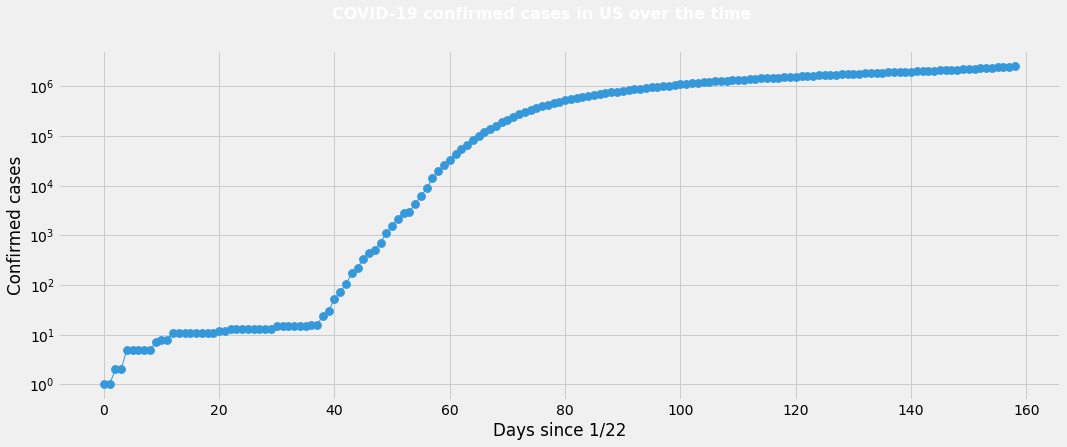

In [284]:
plot_country_data("US")

In [285]:
reversed_top_ten = list(top_10_confirmed.index[:10]).reverse()
print(reversed_top_ten)
print(list(top_10_confirmed.index[:10])[::-1])

None
['Iran', 'Italy', 'Spain', 'Chile', 'Peru', 'United Kingdom', 'India', 'Russia', 'Brazil', 'US']


In [286]:
fig = px.bar(top_10_confirmed.head(10).sort_values(by="Confirmed", ascending=True),
             x="Confirmed", y=list(top_10_confirmed.index[:10])[::-1],
             title='Confirmed Cases', text='Confirmed',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

fig.show()

In [ ]:
top_10_confirmed.loc["MS Zaandam"]

In [287]:
def plot_country_global_info(country):
    country_info = covid_countries_df[covid_countries_df['Country/Region'] == country]
    
    country_info_long = country_info.melt(value_vars=['active', 'deaths', 'recovered'],
                                          var_name="status",
                                          value_name="count")

    country_info_long['upper'] = 'Confirmed cases'
    
    fig = px.treemap(country_info_long, path=["upper", "status"], values="count",
                     title=f"Total COVID-19 confirmed cases in {country}",
                     color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
                     template='plotly_dark')

    fig.data[0].textinfo = 'label+text+value'

    fig.show()

In [288]:
def plot_country_cases_over_time(country, log):
    country_date_info = covid_countries_date_df[covid_countries_date_df['Country/Region'] == country]
    
    fig, ax = plt.subplots(figsize=(16, 6))

    if log:
        ax.set(yscale="log")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
        plt.title("(logarithmic scale)", color='white')

    sns.lineplot(x=country_date_info['date'], y=country_date_info['confirmed'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['deaths'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['recovered'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['active'], sort=False, linewidth=2)
                
    ax.lines[0].set_linestyle("--")

    plt.suptitle(f"COVID-19 cases in {country} over the time", fontsize=16, fontweight='bold', color='white')

    plt.xticks(rotation=45)
    plt.ylabel('Number of cases')

    ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

    plt.show()

In [ ]:
plot_country_cases_over_time("US", False)

In [ ]:
def plot_province_cases(country):
    covid_provinces_df = covid_df.groupby(['Province/State', 'Country/Region']).max().reset_index()
    
    country_provinces_info = covid_provinces_df[covid_provinces_df['Country/Region'] == country]
    
    has_provinces = country_provinces_info.shape[0] > 1
    
    if (has_provinces):
        country_info_long = country_provinces_info.melt(id_vars=['Province/State'],
                                                        value_vars=['active', 'deaths', 'recovered'],
                                                        var_name="status",
                                                        value_name="count")

        country_info_long['upper'] = 'Confirmed cases'

        fig = px.treemap(country_info_long, path=['upper', "Province/State", "status"],
                         values="count",
                         title=f"Number of COVID-19 confirmed cases per Province/State in {country}",
                         template='plotly_dark')
        
        fig.data[0].textinfo = 'label+text+value'

        fig.show()

In [ ]:
def get_country_covid_info(country, log=False):
    #plot_country_global_info(country)
    
    plot_country_cases_over_time(country, log)
    
    plot_province_cases(country)

In [ ]:
#plot_province_cases("China")

In [ ]:
def compare(countries):
  compare_df = pd.DataFrame()
  for country in countries:
    compare_df[country] = data[country]
  compare_df.index = data.index
  plt.figure()
  compare_df.plot(kind="bar")

In [ ]:
compare(["United Kingdom", "China"])

In [ ]:
import math
def compare_over_time(countries):
  fig, ax = plt.subplots(figsize=(16, 6))
  ax.set(yscale="log")
  confirmed_with_dates = covid_confirmed_agg.iloc[:, 3:]
  confirmed_with_dates.index = covid_confirmed_agg["Country/Region"]
  for c in countries:
    sns.lineplot(x=confirmed_with_dates.columns, y=confirmed_with_dates.loc[c, :], sort=False, linewidth=2)
  plt.ylabel('Number of confirmed cases (in log scale)')
  ax.legend(countries)
  plt.show() 

In [ ]:
compare_over_time(["United Kingdom", "China"])

In [ ]:
'''fig = px.bar(top_10_confirmed.sort_values(by='Confirmed', ascending=True),
             x="Confirmed", y="Country/Region",
             title='Confirmed Cases', text='Confirmed',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

fig.show()'''

In [ ]:
graph_top_confirmed()

In [ ]:
def menu():
  answer = int(input("Enter the number for one of the following options: \n1) Most recent confirmed, active, deaths, and recovered cases for a given country \n2) Top ten countries with the most confirmed cases \n3) Top ten countries with the most deaths \n4) Top ten countries with the most recoveries \n5) Top ten countries with highest mortality rates \n6)Worldwide data plotted over time \n7) Most recent worldwide data \n8) Date of first confirmed case for a given country \n9) Mortality and recovery rate worldwide over time \n10) Mortality rate for a given country \n11) Confirmed, deaths, & recovered cases over time for a given country \n12) Compare multiple countries most recent cases counts \n13) Compare multiple countries cases over time \n14) Show the linear regression of a country's cases over time \n"))
  if answer == 1:
    print(data[input("Enter a country: ")])
  elif answer == 2:
    graph_top_confirmed()
  elif answer == 3:
    graph_top_deaths()
  elif answer == 4:
    graph_top_recoveries()
  elif answer == 5:
    plt.figure()
    country_mortality_rates.head(10).plot(kind = "bar")
  elif answer == 6:
    get_worldwide_over_time()
  elif answer == 7:
    plot_worldwide_current()
  elif answer == 8:
    print(get_first_confirmed_case(input("Enter a country: ")))
  elif answer == 9:
    graph_worldwide_rates()
  elif answer == 10:
    get_death_rate(input("Enter a country: "))
  elif answer == 11:
    plot_country_cases_over_time(input("Enter a country: "), False)
  elif answer == 12:
    compare(str(input("Enter as many countries as desired separated by spaces. e.g US China United Kingdom\n")).split())
  elif answer == 13:
    compare_over_time(str(input("Enter as many countries as desired separated by spaces. e.g US China United Kingdom\n")).split())
  elif answer == 14:
    country_regression_confirmed(input("Enter a country"))

In [ ]:
menu()

In [ ]:
from datetime import date
TODAY = date(2020, 6, 29)
def days_since_first_case(country):
  month = int(first_confirmed_case.loc[country, "Date"].split("/")[0])
  day = int(first_confirmed_case.loc[country, "Date"].split("/")[1])
  d1 = date(2020, month, day)
  return (TODAY-d1).days

In [ ]:
days_since_first_case("US")

In [ ]:
covid_confirmed_agg.head()

In [ ]:
from sklearn.linear_model import LinearRegression
def country_regression_confirmed(country):
  #fig, ax = plt.subplots(figsize=(16, 6)) 
  num_days = days_since_first_case(country)
  boo = covid_confirmed_agg["Country/Region"] == country
  x = np.arange(num_days)[:, np.newaxis]
  y = covid_confirmed_agg.loc[boo, covid_confirmed_agg.columns[(covid_confirmed_agg.shape[1]-days_since_first_case(country)):]].values[0]
  model = LinearRegression()
  model.fit(x, y)
  #ax.set(yscale="log")
  plt.scatter(x, y,color='r')
  plt.plot(x, model.predict(x),color='k')
  plt.show()

In [ ]:
country_regression_confirmed("US")

In [ ]:
def country_regression_deaths(country):
  num_days = days_since_first_case(country)
  boo = covid_deaths_agg["Country/Region"] == country
  x = np.arange(num_days)[:, np.newaxis]
  y = covid_deaths_agg.loc[boo, covid_deaths_agg.columns[(covid_deaths_agg.shape[1]-days_since_first_case(country)):]].values[0]
  model = LinearRegression()
  model.fit(x, y)
  plt.scatter(x, y,color='r')
  plt.plot(x, model.predict(x),color='k')
  plt.show()

In [ ]:
country_regression_deaths("US")

In [ ]:
def country_regression_recovered(country):
  num_days = days_since_first_case(country)
  boo = covid_recovered_agg["Country/Region"] == country
  x = np.arange(num_days)[:, np.newaxis]
  y = covid_recovered_agg.loc[boo, covid_recovered_agg.columns[(covid_recovered_agg.shape[1]-days_since_first_case(country)):]].values[0]
  model = LinearRegression()
  model.fit(x, y)
  plt.scatter(x, y,color='r')
  plt.plot(x, model.predict(x),color='k')
  plt.show()

In [ ]:
country_regression_recovered("US")

Starting Regression analysis

In [ ]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_countries_date_df.drop(['Lat', 'Long'], axis=1, inplace=True)
covid_countries_date_df.head()

In [ ]:
covid_country = country_sub_data("US")
covid_country.head()

In [ ]:
days = np.array([i for i in range(len(covid_country['date']))])

days

In [ ]:
COUNTRY = "US"
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.show()

As the cases have grown with more volume in the last weeks, we won't use the first 30 values (first ~4 weeks).

In [ ]:
SKIP_DAYS = 90
covid_country

In [ ]:
covid_country_confirmed_sm = list(covid_country['confirmed'][SKIP_DAYS:])

covid_country_confirmed_sm[:15]


## Data representation

We'll be using [scikit-learn](https://scikit-learn.org/) as tool for our predictive analysis.

Let's define `X` features and `y` labels:

In [ ]:
X = days[SKIP_DAYS:].reshape(-1, 1)


In [ ]:
y = list(np.log(covid_country_confirmed_sm))


---
### Train and Test split

Now that we have our features and labels defined, let's split them into train and test sets.

## Our first Machine Learning model

Let's create a simple Linear Regression model using the `LinearRegression` method from `scikit-learn`.

After creating our model, we'll train it using our `X_train` and `y_train` data using the `fit()` method.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=False)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train, y_train)

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear_model.predict(X_train)
(y_pred- y_train)

In [ ]:
print('MAE:', mean_absolute_error(y_pred, y_train))
print('MSE:',mean_squared_error(y_pred, y_train))

In [ ]:
y_pred = linear_model.predict(X_test)
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

In [ ]:
plt.scatter(X, y,color='r')
plt.plot(X, linear_model.predict(X),color='k')
plt.show()

In [ ]:
# Machine learning model for US deaths
covid_country_deaths_sm = list(covid_country['deaths'][SKIP_DAYS:])
covid_country_deaths_sm[:15]
y_2 = list(np.log(covid_country_deaths_sm))
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X, y_2,
                                                    test_size=0.1,
                                                    shuffle=False)
linear_model_deaths = LinearRegression(fit_intercept=True)
linear_model_deaths.fit(X_train_deaths, y_train_deaths)
y_pred_deaths = linear_model_deaths.predict(X_test_deaths)
y_pred_deaths

In [ ]:
print('MAE:', mean_absolute_error(y_pred_deaths, y_test_deaths))
print('MSE:',mean_squared_error(y_pred_deaths, y_test_deaths))

In [ ]:
covid_country_recovered_sm = list(covid_country['recovered'][SKIP_DAYS:])
covid_country_recovered_sm[50:]

In [ ]:
# Machine learning model for US recoveries
import math 
y_3 = list(np.log(covid_country_recovered_sm))
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(X, y_3,
                                                    test_size=0.1,
                                                    shuffle=False)
'''x = [1,2,3,float('nan')]
 for y in y_train_recovered:
   print(y, math.isnan(y))'''
#covid_country.tail()

In [ ]:
linear_model_recovered = LinearRegression(fit_intercept=True)
linear_model_recovered.fit(X_train_recovered, y_train_recovered)
y_pred_recovered = linear_model_recovered.predict(X_test_recovered)
y_pred_recovered

In [ ]:
print('MAE:', mean_absolute_error(y_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(y_pred_recovered, y_test_recovered))

### Forecasting next 2 weeks COVID-19 cases

As linear regression formula is:

$$ y = a.x + b $$

We can get the `a` coefficient and `b` interceptor from our model:

In [ ]:
x_confirmed_forecast = np.arange(156, 170)
x_confirmed_forecast

In [ ]:
a_confirmed = linear_model.coef_
b_confirmed = linear_model.intercept_
a_confirmed

In [ ]:
y_confirmed_forecast = []
for x in x_confirmed_forecast:
   y_confirmed_forecast.append(((a_confirmed * x) + b_confirmed)[0])
y_confirmed_forecast

In [ ]:
'''X_fore = list(np.arange(len(days), len(days) + 14))
y_fore = [(a*x+b)[0] for x in X_fore]

X_fore, y_fore'''

In [ ]:
y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_fore_l = list(np.exp(y_confirmed_forecast))

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=x_confirmed_forecast, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])

plt.show()

Now in linear scale we can see corretly the evolution and forecast of COVID-19 confirmed cases.

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=x_confirmed_forecast, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()